In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Clean data

In [3]:
# CSV file
data2 = pd.read_csv('./data/measurements.csv')
display(data2.head(),data2.shape)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


(388, 12)

In [4]:
# Excel file (main)
data = pd.read_excel('./data/measurements2.xlsx')
display(data2.head(),data2.shape)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


(388, 12)

In [5]:
# Standardize column's name
data = data.rename(columns={'refill liters': 'refill_liters',
                            'refill gas': 'refill_gas',
                           'consume':'consume_100km'})

#### Clean data

In [6]:
# Check column types and null values in original dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume_100km  388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  13 non-null     float64
 11  refill_gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [7]:
# Change binary columns (AC, rain and sun) to categorical
data['AC'] = data['AC'].astype('object')
data['rain'] = data['rain'].astype('object')
data['sun'] = data['sun'].astype('object')

##### Dealing with NaN values

In [8]:
# Look for NaN values
data.isna().sum()

distance           0
consume_100km      0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

- temp_inside

In [9]:
data['temp_inside'].value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [10]:
# Temp_inside stats
data['temp_inside'].describe()

count    376.000000
mean      21.929521
std        1.010455
min       19.000000
25%       21.500000
50%       22.000000
75%       22.500000
max       25.500000
Name: temp_inside, dtype: float64

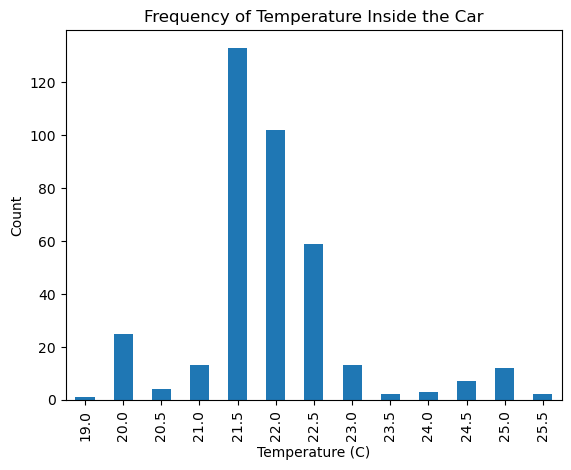

In [11]:
# Compute frequency counts of 'temp_inside' column
temp_counts = data['temp_inside'].value_counts().sort_index()

# Create bar plot of frequency counts
temp_counts.plot(kind='bar')

# Add axis labels and title
plt.xlabel('Temperature (C)')
plt.ylabel('Count')
plt.title('Frequency of Temperature Inside the Car')

# Display the plot
plt.show()

In [12]:
# Replace NaN values with the median
data['temp_inside'].fillna(data['temp_inside'].median(), inplace=True)

- specials

In [13]:
data['specials'].value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [14]:
# Create new column 'snow'
data['snow'] = np.where((data['specials'] == 'snow') | (data['specials'] == 'AC snow'), 1, 0)
data['snow'].value_counts()

0    384
1      4
Name: snow, dtype: int64

- refill_gas

In [15]:
data['refill_gas'].value_counts(dropna=False)

NaN     375
SP98      8
E10       5
Name: refill_gas, dtype: int64

In [16]:
percent_nan = round(data['refill_gas'].isna().sum() / len(data['refill_gas']) * 100, 2)
print(f"Percentage of NaN values in 'refill_gas' column: {percent_nan}%")

Percentage of NaN values in 'refill_gas' column: 96.65%


In [17]:
# Delete 'specials' and 'refill_gas' (same information as gas type and too many NaN values)
data = data.drop(['specials','refill_gas'], axis = 1)
data.shape

(388, 11)

- refill_liters

In [18]:
data['refill_liters'].value_counts(dropna=False)

NaN     375
45.0      2
37.7      2
39.0      2
37.6      1
38.0      1
38.3      1
10.0      1
41.0      1
37.0      1
37.2      1
Name: refill_liters, dtype: int64

In [19]:
percent_nan = round(data['refill_liters'].isna().sum() / len(data['refill_liters']) * 100, 2)
print(f"Percentage of NaN values in 'refill_liters' column: {percent_nan}%")

Percentage of NaN values in 'refill_liters' column: 96.65%


In [20]:
# Drop 'refill_liters' as there are too many NaN values
data = data.drop(['refill_liters'],axis=1)

##### Adding extra columns

In [21]:
# New column to calculate actual consume per ride
data['consume_real'] = (data['consume_100km']/100)*data['distance']
data['consume_real'].head()

0    1.4000
1    0.5040
2    0.6160
3    0.5031
4    0.8325
Name: consume_real, dtype: float64

In [22]:
# New column to calculate actual cost per ride
data['cost_real'] = np.where(data['gas_type']=='E10', data['consume_real']*1.38, data['consume_real']*1.46)
data['cost_real'].head()

0    1.932000
1    0.695520
2    0.850080
3    0.694278
4    1.148850
Name: cost_real, dtype: float64

In [23]:
# Rearrange columns
data = data[['distance','consume_100km', 'consume_real','gas_type','cost_real',
             'speed', 'temp_inside', 'temp_outside', 'AC', 'sun','rain', 'snow']]
#data.head(10)

## Exploratory Data Analysis

In [24]:
data

,distance,consume_100km,consume_real,gas_type,cost_real,speed,temp_inside,temp_outside,AC,sun,rain,snow
0,28.0,5.0,1.4000,E10,1.932000,26,21.5,12,0,0,0,0
1,12.0,4.2,0.5040,E10,0.695520,30,21.5,13,0,0,0,0
2,11.2,5.5,0.6160,E10,0.850080,38,21.5,15,0,0,0,0
3,12.9,3.9,0.5031,E10,0.694278,36,21.5,14,0,0,0,0
4,18.5,4.5,0.8325,E10,1.148850,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,0.5920,SP98,0.864320,39,24.5,18,0,0,0,0
384,16.1,4.3,0.6923,SP98,1.010758,38,25.0,31,1,0,0,0
385,16.0,3.8,0.6080,SP98,0.887680,45,25.0,19,0,0,0,0
386,15.4,4.6,0.7084,SP98,1.034264,42,25.0,31,1,0,0,0


General consume per type of gas:

In [25]:
# Calculate mean difference for each gas type
means = data.groupby('gas_type')[['consume_100km', 'consume_real']].mean()

# Calculate difference between E10 and SP98
difference = means.loc['E10'] - means.loc['SP98']

# Add difference as new row
means.loc['difference'] = difference

# Transpose DataFrame (rows to columns)
means = means.T

means

gas_type,E10,SP98,difference
consume_100km,4.931250,4.899123,0.032127
consume_real,1.008933,0.883618,0.125314


E10 gas is less efficient than SP98.

General consume by type of gas and distance and speed

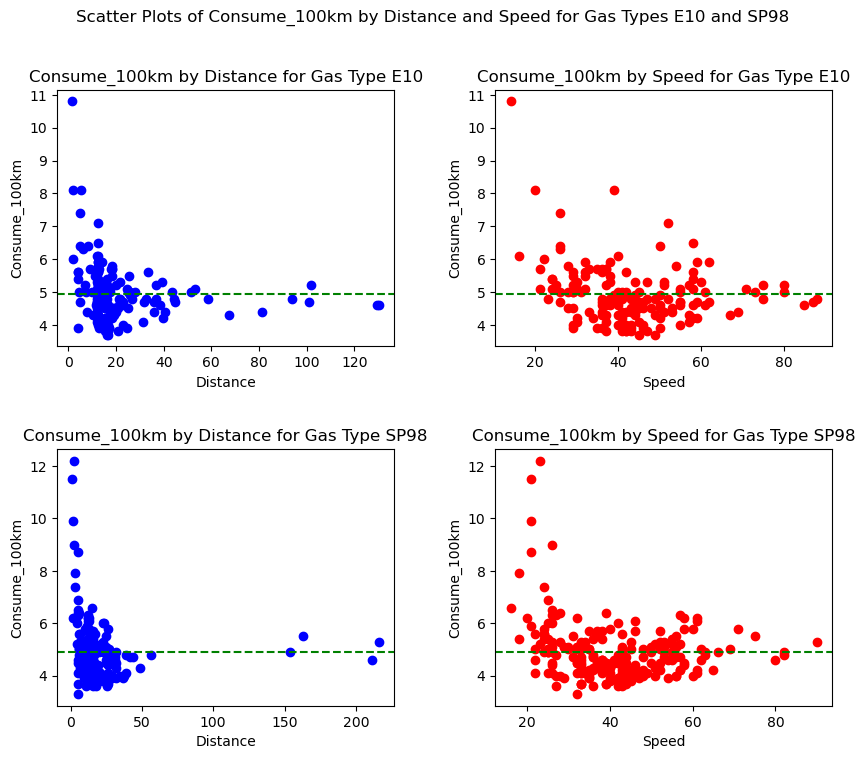

In [26]:
# Figure and subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot of consume_100km by distance on first E10 subplot with blue color
ax1.scatter(data[data['gas_type']=='E10']['distance'], data[data['gas_type']=='E10']['consume_100km'], color='blue')
ax1.axhline(y=data[data['gas_type']=='E10']['consume_100km'].mean(), color='green', linestyle='--')
ax1.set_xlabel('Distance')
ax1.set_ylabel('Consume_100km')
ax1.set_title('Consume_100km by Distance for Gas Type E10')

# Scatter plot of consume_100km by speed on second E10 subplot with red color
ax2.scatter(data[data['gas_type']=='E10']['speed'], data[data['gas_type']=='E10']['consume_100km'], color='red')
ax2.axhline(y=data[data['gas_type']=='E10']['consume_100km'].mean(), color='green', linestyle='--')
ax2.set_xlabel('Speed')
ax2.set_ylabel('Consume_100km')
ax2.set_title('Consume_100km by Speed for Gas Type E10')

# Scatter plot of consume_100km by distance on first SP98 subplot with blue color
ax3.scatter(data[data['gas_type']=='SP98']['distance'], data[data['gas_type']=='SP98']['consume_100km'], color='blue')
ax3.axhline(y=data[data['gas_type']=='SP98']['consume_100km'].mean(), color='green', linestyle='--')
ax3.set_xlabel('Distance')
ax3.set_ylabel('Consume_100km')
ax3.set_title('Consume_100km by Distance for Gas Type SP98')

# Scatter plot of consume_100km by speed on second SP98 subplot with red color
ax4.scatter(data[data['gas_type']=='SP98']['speed'], data[data['gas_type']=='SP98']['consume_100km'], color='red')
ax4.axhline(y=data[data['gas_type']=='SP98']['consume_100km'].mean(), color='green', linestyle='--')
ax4.set_xlabel('Speed')
ax4.set_ylabel('Consume_100km')
ax4.set_title('Consume_100km by Speed for Gas Type SP98')

# Add title to figure
fig.suptitle('Scatter Plots of Consume_100km by Distance and Speed for Gas Types E10 and SP98')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.show()


General consume by gas_type with and without AC

In [27]:
ac_gas_mean = data.groupby(['AC', 'gas_type'])['consume_100km'].mean()
ac_gas_mean

AC  gas_type
0   E10         4.922876
    SP98        4.854146
1   E10         5.114286
    SP98        5.300000
Name: consume_100km, dtype: float64

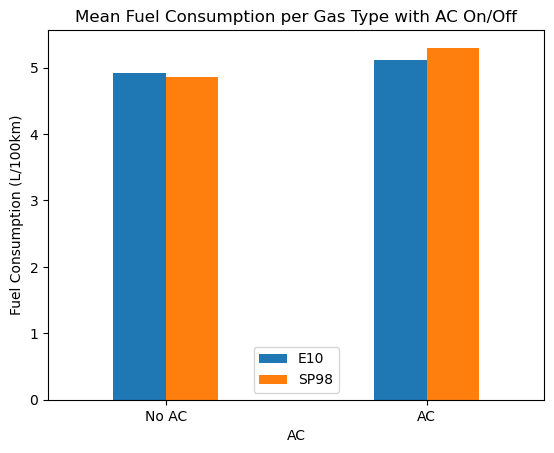

In [28]:
# Pivot the hierarchical index so that AC becomes the columns
ac_gas_mean = ac_gas_mean.unstack(level=1)

# Create the bar plot
ax = ac_gas_mean.plot(kind='bar', rot=0, width=0.4)

# Set the axis labels and title
ax.set_xlabel('AC')
ax.set_ylabel('Fuel Consumption (L/100km)')
ax.set_title('Mean Fuel Consumption per Gas Type with AC On/Off')

# Set the legend labels
ax.legend(['E10', 'SP98'])

# Set the x-axis tick labels
ax.set_xticklabels(['No AC', 'AC'])

ax.set_xticks(range(len(ac_gas_mean.columns)))


plt.show()


SP98 has a lower consume only when the ride is without AC 

In [29]:
data.dtypes

distance         float64
consume_100km    float64
consume_real     float64
gas_type          object
cost_real        float64
speed              int64
temp_inside      float64
temp_outside       int64
AC                object
sun               object
rain              object
snow               int64
dtype: object

#### Numerical Data

In [30]:
# Check numerical data
numerical = data.select_dtypes(include = np.number)
display(numerical.describe(), numerical.shape)

,distance,consume_100km,consume_real,cost_real,speed,temp_inside,temp_outside,snow
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,0.935294,1.332245,41.927835,21.931701,11.358247,0.010309
std,22.667837,1.033172,1.115967,1.601124,13.598524,0.994741,6.991542,0.101140
min,1.300000,3.300000,0.120000,0.165600,14.000000,19.000000,-5.000000,0.000000
25%,11.800000,4.300000,0.551650,0.780550,32.750000,21.500000,7.000000,0.000000
50%,14.600000,4.700000,0.680600,0.964800,40.500000,22.000000,10.000000,0.000000
75%,19.000000,5.300000,0.916500,1.301350,50.000000,22.500000,16.000000,0.000000
max,216.100000,12.200000,11.453300,16.721818,90.000000,25.500000,31.000000,1.000000


(388, 8)

<AxesSubplot:>

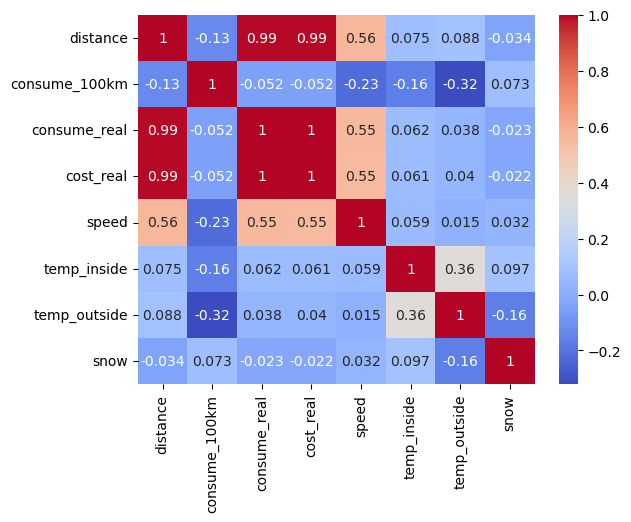

In [31]:
# Correlation matrix
corr_matrix = numerical.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

As expected, aggregated features (consume_real and cost_real) must be drop before modelling as they have too much colinearity. However, none of the other features show any strong correlation.

#### Categorical data

In [32]:
categorical = data.select_dtypes(include='object')
categorical.shape

(388, 4)

In [33]:
for col in categorical.columns:
    print(data[col].value_counts(dropna=False))

SP98    228
E10     160
Name: gas_type, dtype: int64
0    358
1     30
Name: AC, dtype: int64
0    356
1     32
Name: sun, dtype: int64
0    340
1     48
Name: rain, dtype: int64


## Regression Models

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [35]:
# Drop columns with excessive colinearity
data_model = data.drop(['consume_real','cost_real'],axis=1)
data_model.shape

(388, 10)

In [36]:
data_model.head()

,distance,consume_100km,gas_type,speed,temp_inside,temp_outside,AC,sun,rain,snow
0,28.0,5.0,E10,26,21.5,12,0,0,0,0
1,12.0,4.2,E10,30,21.5,13,0,0,0,0
2,11.2,5.5,E10,38,21.5,15,0,0,0,0
3,12.9,3.9,E10,36,21.5,14,0,0,0,0
4,18.5,4.5,E10,46,21.5,15,0,0,0,0


#### Target: consume_100 km

#### X/y Split

In [37]:
y = data_model['consume_100km']
X = data_model.drop(['consume_100km'],axis=1)

#### Train-Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#### Numerical-Categorical X Split

In [39]:
# Numericals
X_train_num = X_train.select_dtypes(include=np.number)
X_test_num = X_test.select_dtypes(include=np.number)

# Categoricals
X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')

##### Scaling Numericals

In [40]:
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the numerical train features
X_train_num_scaled = scaler.fit_transform(X_train_num)

# Transform the scaler on the numerical test features
X_test_num_scaled = scaler.transform(X_test_num)


##### Encoding Categoricals

In [41]:
# Create the OneHotEncoder object
encoder = OneHotEncoder(drop='first')

# Fit and transform the encoder on the training categorical columns
train_encoded = encoder.fit_transform(X_train_cat)

# Transform the encoder on the testing categorical columns
test_encoded = encoder.transform(X_test_cat)

# Get the names of the encoded features
feature_names = encoder.get_feature_names_out(X_train_cat.columns)

# Convert the encoded array back into dataframes with the feature names
X_train_cat_encoded = pd.DataFrame(train_encoded.toarray(), columns=feature_names)
X_test_cat_encoded = pd.DataFrame(test_encoded.toarray(), columns=feature_names)


##### Combine scaled and encoded TRAIN data

In [42]:
# combine the scaled numerical features and the categorical encoded features of the training data
train_processed = pd.concat([pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns), X_train_cat_encoded.reset_index(drop=True)], axis=1)

##### Combine scaled and encoded TEST data

In [43]:
# Combine the numerical and categorical features back into a single dataframe for the test data
test_processed = pd.concat([pd.DataFrame(X_test_num_scaled, columns=X_train_num.columns), X_test_cat_encoded], axis=1)

#### Linear Regression Model

In [44]:
# LinearRegression
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(train_processed, y_train)

# Predict on the test data
y_pred = lr_model.predict(test_processed)

print(y_pred[:10], y[:10])

[4.8181351  5.24553442 5.16622351 5.23701681 4.52553758 7.03787488
 5.71131983 5.24016459 5.84036419 4.95896544] 0    5.0
1    4.2
2    5.5
3    3.9
4    4.5
5    6.4
6    4.4
7    5.0
8    6.4
9    5.3
Name: consume_100km, dtype: float64


In [45]:
# Evaluate the model performance
mse = round(mean_squared_error(y_test, y_pred),2)
mae = round(mean_absolute_error(y_test, y_pred),2)
rmse = round(np.sqrt(mse),2)
r2 = round(r2_score(y_test, y_pred),2)

print("R-squared:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)

R-squared: 0.04
Mean squared error: 0.8
Root mean squared error: 0.89
Mean absolute error: 0.68


In [46]:
data_model['consume_100km'].describe().T

count    388.000000
mean       4.912371
std        1.033172
min        3.300000
25%        4.300000
50%        4.700000
75%        5.300000
max       12.200000
Name: consume_100km, dtype: float64

#### Alternative I: Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(train_processed, y_train)

# Predict on the test data
y_pred = rf_model.predict(test_processed)

# Evaluate the model performance
mse_rf = round(mean_squared_error(y_test, y_pred),2)
mae_rf = round(mean_absolute_error(y_test, y_pred),2)
rmse_rf = round(np.sqrt(mse),2)
r2_rf = round(r2_score(y_test, y_pred),2)

print("R-squared:", r2_rf)
print("Mean squared error:", mse_rf)
print("Root mean squared error:", rmse_rf)
print("Mean absolute error:", mae_rf)

R-squared: 0.59
Mean squared error: 0.34
Root mean squared error: 0.89
Mean absolute error: 0.43


#### Alternative II: Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_model.fit(train_processed, y_train)

# Predict on the test data
y_pred = dt_model.predict(test_processed)

# Evaluate the model performance
mse_dt = round(mean_squared_error(y_test, y_pred),2)
mae_dt = round(mean_absolute_error(y_test, y_pred),2)
rmse_dt = round(np.sqrt(mse_dt),2)
r2_dt = round(r2_score(y_test, y_pred),2)

print("R-squared:", r2_dt)
print("Mean squared error:", mse_dt)
print("Root mean squared error:", rmse_dt)
print("Mean absolute error:", mae_dt)

R-squared: 0.08
Mean squared error: 0.77
Root mean squared error: 0.88
Mean absolute error: 0.59


## Conclusions

In [49]:
# Create dataframe with performance metrics 

# Create dictionary
metrics_dict = {
    'Model': ['Linear Regression', 'Decision Tree Regressor','Random Forest Regressor'],
    'R-squared': [r2,r2_dt,r2_rf],
    'Mean Squared Error': [mse,mse_dt, mse_rf],
    'Root Mean Squared Error': [rmse,rmse_dt, rmse_rf],
    'Mean Absolute Error': [mae,mae_dt, mae_rf]
}

# Create the dataframe
metrics_df = pd.DataFrame.from_dict(metrics_dict)

# Set the Model column as the index
metrics_df.set_index('Model', inplace=True)

metrics_df

,R-squared,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
Model,,,,
Linear Regression,0.04,0.80,0.89,0.68
Decision Tree Regressor,0.08,0.77,0.88,0.59
Random Forest Regressor,0.59,0.34,0.89,0.43


The Random Forest Regressor outperforms both the Linear Regression and Decision Tree Regressor models in terms of R-squared, Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error, indicating that it has the best predictive performance.